<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final - CODERHOUSE

Alumna: Carolina Cortez Schall

COMISION 60935

Tema: Calidad del vino


# Características de la composición del vino

***Resúmen***

La producción vitivinícola conlleva una serie de desafíos a tener en cuenta, frente al vertiginoso crecimiento de la comercialización y exportación de vinos de calidad. Por lo cual la calidad se constituye como el objeto de estudio frente a la satisfacción de necesidades y exigencias del público consumidor de vinos.
Es de común conocimiento que, la búsqueda de la calidad se relaciona directamente y proporcialmente con el valor económico que implica, así como la demanda que este provoca. El sujeto consumidor realiza una búsqueda y valoración de vinos de calidad, potenciando la exigencia, además de la experticia de quien consume desde un lugar de mayor conocimiento.
Por esto mismo, es menester la valoración y análisis frente a las característcias y componentes que son parte de la producción del vino, para el aseguramiento de la calidad del producto final de consumo.

***Objetivo***

El objetivo principal de este estudio es identificar y analizar las relaciones entre los niveles de acidez y la calidad del vino, para una mejora del producto final de consumo.

***Contexto Comercial***

El mercado vitivinícola se encuentra frente a un crecimiento constante a nivel mundial. La cultura popular y de disfrute en un entorno de experimentar los diversos placeres de la vida, lleva a un consumo mayor del vino como un producto de valor frente al disfrute y la salud.

Se trabaja con la información necesaria desde la categorización "calidad" de vinos y sus diversos componentes que intervienen en ella, modificándola en relación a su mejora o disminución de calidad del mismo.

***Desafío Comercial***

Conocer de qué manera influye los niveles de acidificación en la producción del vino para la obtención de un vino de mayor calidad.

***Preguntas de análisis***

1. ¿Cómo influye la la acidez en la calidad del vino?

2. ¿El ph del vino se relaciona directamente con la calidad del mismo?

3. ¿Qué tipo de acidez afecta más la calidad de vino?

4. La acidez del vino determina la graduación etílica?



***Hipótesis***

1. Tener una mayor acidez provoca mayor calidad del vino.

2. El ph del vino presenta relación con la calidad del vino.

3. El ácido cítrico tiene mayor impacto positivo en la mejora de la calidad del vino.

4. La graduación etílica se encuentra determinado por la acidez del vino.

# Importaciones

In [219]:
#Importación de librerías para análisis
import pandas as pd
import numpy as np

#Archivo de datos
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()

# Importación de librerias para visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importación de librerias para machine learning
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.special import jv
from google.colab import drive
import os
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [156]:
# prompt: Con DataFrame df: df_archivo

df_archivo = df.rename(columns={0: 'AF', 1: 'AV', 2: 'AC', 3: 'AR', 4: 'CL', 5: 'DSL', 6: 'DST', 7: 'DEN', 8: 'PH', 9: 'SUL', 10: 'ALC', 11: 'CAL', 12: 'ID'})
df_archivo

,AF,AV,AC,AR,CL,DSL,DST,DEN,PH,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1140,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1141,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5,1594
1142,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6,1595


# Descripción de variables incorporadas

**Variables incorporadas - Conceptualización**

0. ***Acidez Fija***

Conjunto de ácidos naturales del vino que ya hemos visto anteriormente (tartárico, málico, cítrico, succínico y láctico) (AF).

1. ***Acidez Volátil***

Cantidad de ácido acético del vino. La medida normal es de 0,3 a 0,6 gramos por litro. Cuanto menor acidez volátil tenga un vino mayor será la calidad (AV).

2. ***Acidez Cítrica***

Es el ácido menos común en el vino, produce una sensación de acidez muy fresca y brillante en el paladar (AC).

3. ***Azúcar Residual***

Es lo que queda después de que las uvas hayan pasado por el proceso de elaboración del vino (AR).

4. ***Cloruros***

Uno de los principales componentes de las sales en el vino son los cloruros, las sales minerales en el vino producen en organismo placer organoléptico, favorecen la hidratación, resalta sabores de los alimentos (mg/L.(CL).

5. ***Dióxido Sulfúrico Libre***

El SO2 se añade durante la elaboración del vino como conservante, lo que permite obtener vinos con menor oxidación al inhibir la reacción del oxígeno gracias a su capacidad reductora. Esto mejora las propiedades organolépticas del vino, realzando su sabor, color y aroma(DSL).

6. ***Dióxido Sulfúrico Total***

El Dióxido de azufre se usa para preservar el color, sabor y estabilidad del vino. Al ser un antimicrobiano, el SO2 interfiere con los caminos metabólicos de la levadura y bacterias (DST).

7. ***Densidad***

En los vinos, el azúcar se ha transformado en alcohol, cuya densidad es 0,798 (DEN).

8. ***Grado de acidez o alcalinidad***

La mayoría de los vinos tienen un valor de pH entre 3.0 y 4.0 (PH).

9. ***Sulfatos***

Los sulfitos del vino se utilizan para detener la fermentación en un punto específico del proceso de elaboración vinícola. Además, son conservantes que previenen el deterioro y la oxidación, y brindan protección contra las bacterias (SUL).

10. ***Alcohol***

En el caso de los vinos, cabe destacar que, según indica la legislación vigente, su graduación mínima será de 9% vol (ALC).

11. ***Calidad***

Combinación de los componentes anteriores (CAL).

12. ***Identificación***

Identificador del producto analizado en sus componentes (ID).

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [158]:
#Información sobre el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1144 non-null   object
 1   1       1144 non-null   object
 2   2       1144 non-null   object
 3   3       1144 non-null   object
 4   4       1144 non-null   object
 5   5       1144 non-null   object
 6   6       1144 non-null   object
 7   7       1144 non-null   object
 8   8       1144 non-null   object
 9   9       1144 non-null   object
 10  10      1144 non-null   object
 11  11      1144 non-null   object
 12  12      1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


A partir de la información aportada, puede conocerse las 12 columnas con tipos de datos "object", los cuales transformaremos en "categóricos para un mejor cruce de los mismos y ahorrar memoria.

In [159]:
# Conversión de columnas en tipo de datos categóricos
category_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df[df.columns[category_indexes]] = df[df.columns[category_indexes]].astype('category')

In [160]:
#Resultado del cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1144 non-null   category
 1   1       1144 non-null   category
 2   2       1144 non-null   category
 3   3       1144 non-null   category
 4   4       1144 non-null   category
 5   5       1144 non-null   category
 6   6       1144 non-null   category
 7   7       1144 non-null   category
 8   8       1144 non-null   category
 9   9       1144 non-null   category
 10  10      1144 non-null   category
 11  11      1144 non-null   category
 12  12      1144 non-null   category
dtypes: category(13)
memory usage: 107.0 KB


In [161]:
# Indexación y posición de datos. En este caso en la posición 5 para tener un
# panorama aleatorio en la exploración de datos
df.iloc[4]

0      11.2
1      0.28
2      0.56
3       1.9
4     0.075
5      17.0
6      60.0
7     0.998
8      3.16
9      0.58
10      9.8
11        6
12        3
Name: 4, dtype: object

In [67]:
# Nombres de las columnas a partir de la posición
df.iloc[0]

0            fixed acidity
1         volatile acidity
2              citric acid
3           residual sugar
4                chlorides
5      free sulfur dioxide
6     total sulfur dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
11                 quality
12                      Id
Name: 0, dtype: object

In [162]:
# Tamaño de la base de datos
df.shape

(1144, 13)

In [163]:
# Columnas de la base de datos
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [164]:
# Tipos de datos finales
df.dtypes

0     category
1     category
2     category
3     category
4     category
5     category
6     category
7     category
8     category
9     category
10    category
11    category
12    category
dtype: object

In [165]:
# renombramos las columnas
df= df.rename(columns={0: "AF", 1: "AV", 2: "AC",3:"AR",4:"CL",5:"DSL",6:"DST",7:"DEN",8:"PH",9:"SUL",10:"ALC",11:"CAL",12:"ID"})
df.head()

,AF,AV,AC,AR,CL,DSL,DST,DEN,PH,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


In [166]:
y = df.sum(axis='columns')
y

0       fixed acidityvolatile aciditycitric acidresidu...
1            7.40.70.01.90.07611.034.00.99783.510.569.450
2            7.80.880.02.60.09825.067.00.99683.20.689.851
3           7.80.760.042.30.09215.054.00.9973.260.659.852
4          11.20.280.561.90.07517.060.00.9983.160.589.863
                              ...                        
1139    6.30.510.132.30.07629.040.00.995743.420.7511.0...
1140    6.80.620.081.90.06828.038.00.996513.420.829.56...
1141     6.20.60.082.00.0932.044.00.99493.450.5810.551594
1142    5.90.550.12.20.06239.051.00.99512000000000013....
1143    5.90.6450.122.00.07532.044.00.9954700000000001...
Length: 1144, dtype: object

In [167]:
# Indexación de la columna de ID
# Verificar si la carga de datos es correcta y comprender la estructura y el contenido del DataFrame.
file_path = 'https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(file_path, index_col=12)
df_archivo=df
df_archivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [168]:
# Análisis estadístico de las columnas, redondeando en un decimal
df_archivo.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


In [169]:
# El resultado será un resumen estadístico de las columnas transpuestas, lo que significa que ahora estás obteniendo estadísticas para cada fila original del DataFrame
df_archivo.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [170]:
# Resúmen estadístico de las columnas, redondeando en un decimal
resumen=df.describe().round(1)
resumen

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


In [171]:
# Serie que muestra el número de valores faltantes en cada columna del DataFrame
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [172]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [173]:
# Suma de datos por columna
df_archivo.sum()

fixed acidity            9499.600000
volatile acidity          607.320000
citric acid               306.740000
residual sugar           2894.250000
chlorides                  99.364000
free sulfur dioxide     17848.500000
total sulfur dioxide    52480.500000
density                  1139.262860
pH                       3784.490000
sulphates                 751.760000
alcohol                 11935.333333
quality                  6466.000000
dtype: float64

In [174]:
#suma de datos por fila (0)
df_archivo.mean()

fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  5.657043
dtype: float64

In [175]:
#suma de datos por columna (1)
df_archivo.sum(axis='columns')

Id
0        74.54380
1       123.05480
2        99.69900
3       111.55300
4        74.54380
          ...    
1592    100.48174
1593     96.20451
1594    105.49490
1595    121.28712
1597    105.21547
Length: 1143, dtype: float64

In [176]:
# Suma de valores agrupados de las columnas relacionadas a la acidificación del vino y su calidad
# Muestra las primeras 15 filas del resultado
df.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].sum().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,50.7,5.385,1.27
4,257.7,23.100,5.47
5,3941.8,282.690,115.98
6,3842.8,233.290,121.82
7,1265.7,56.295,55.28
8,140.9,6.560,6.92


In [177]:
# Promedio o media aritmética de los valores pertenecientes a la acidificación del vino respecto a la calidad del mismo
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].mean().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,8.450000,0.897500,0.211667
4,7.809091,0.700000,0.165758
5,8.161077,0.585280,0.240124
6,8.317749,0.504957,0.263680
7,8.851049,0.393671,0.386573
8,8.806250,0.410000,0.432500


In [221]:
# Cálculo estadístico descriptivo para las columnas 'fixed acidity', 'volatile acidity' y 'citric acid'
# dentro de cada grupo de calidad del vino
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                 6.0  8.450000  2.032486  6.7  7.15  7.45   9.700  11.6   
4                33.0  7.809091  1.685668  4.6  6.70  7.60   8.500  12.5   
5               483.0  8.161077  1.557746  5.0  7.10  7.80   8.900  15.9   
6               462.0  8.317749  1.771585  5.0  7.00  7.90   9.275  14.3   
7               143.0  8.851049  2.105187  4.9  7.40  8.70  10.100  15.6   
8                16.0  8.806250  2.089168  5.0  7.35  8.85  10.400  12.6   

        volatile acidity            ...                citric acid            \
                   count      mean  ...      75%   max       count      mean   
quality                             ...                                        
3                    6.0  0.897500  ...  0.95375  1.58         6.0  0.211667   
4                   33.0  0.700000  ...  0.88000  1.09        33.0  0.165758   
5                  483.0  0.585280  ...  0.68000  1.33       483.0  0.240124   
6                  462.0  0.504957  ...  0.60875  1.04       462.0  0.263680   
7                  143.0  0.393671  ...  0.48000  0.84       143.0  0.386573   
8                   16.0  0.410000  ...  0.42000  0.85        16.0  0.432500   

                                                      
              std   min     25%    50%     75%   max  
quality                                               
3        0.287153  0.00  0.0275  0.050  0.3800  0.66  
4        0.211335  0.00  0.0300  0.070  0.2400  1.00  
5        0.179700  0.00  0.0900  0.230  0.3500  0.79  
6        0.195371  0.00  0.0800  0.245  0.4200  0.74  
7        0.197812  0.00  0.3200  0.400  0.5050  0.76  
8        0.168977  0.05  0.3250  0.455  0.5325  0.72  

[6 rows x 24 columns]

In [179]:
# conteo del numero de valores que son 0 por columnas
nun_missing = (df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "sulphates", "alcohol", "quality", "pH"]]== 0).sum()
print(nun_missing)

fixed acidity        0
volatile acidity     0
citric acid         99
residual sugar       0
chlorides            0
density              0
sulphates            0
alcohol              0
quality              0
pH                   0
dtype: int64


In [180]:
# Completamiento de los valores faltantes con la media de cada columna
!pip install scikit-learn
from sklearn.impute import SimpleImputer
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)
print(df.shape)
print(df.head())

(1144, 13)
              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

        10       11  12  
0  alcohol  quality  Id  
1      9.4        5   0

Observación

Si bien el df no presenta datos faltantes como se evidencia al inicio de este trabajo, me pareció interesante ver las posibilidades de resolución, a modo de entrenamiento en este curso.

# VISUALIZACIÓN GRÁFICA DE DATOS


Se busca analizar y comprender el comportamiento en la producción del vino, de las variables que intervienen en ella. Nos focalizaremos sobre la acidificación del vino y su vinculación o impacto en la calidad final del mismo.

Para esto buscamos cruzar las variables de acidez fija, acidez volátil y ácido cítrico, así como también el nivel de acidez o alcalinidad del producto (PH). Por último, queremos indagar sobre la relación entre el nivel etílico y la calidad del vino, para conocer alguna relación directa o indirecta.

Para esto, trabajaremos algunos instrumentos de visualización que faciliten la comprensión del comportamiento de las variables que afectan a la producción final del vino desde su calidad.

A partir de errores e inconvenientes con las columnas de calidad y ácido cítrico, es que se realiza este reajuste a partir de la revisión técnica de lo realizado. Se eliminaron varios códigos que fueron utilizados a modo de ejercicio frente al aprendizaje del lenguaje en programación y análisis de datos, que estaban constituyendo un problema a la hora de graficar resultados. Esta revisión se presenta a continuación.

In [181]:
# Mostrar las primeras filas del DataFrame para verificar la estructura
print(df_archivo.head())

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df_archivo.columns)

# Eliminar duplicados de columnas si existen
df_archivo = df_archivo.loc[:, ~df_archivo.columns.duplicated()]

# Verificar las columnas después de eliminar duplicados
print("Columnas después de eliminar duplicados:")
print(df_archivo.columns)

# Asegurarse de que las columnas necesarias están presentes
required_columns = ['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'alcohol']

for col in required_columns:
    if col not in df_archivo.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en el DataFrame")

# Establecer el estilo de seaborn para las visualizaciones
sns.set(style="whitegrid")

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58

# Cruce de variables independientes a partir de la dependiente (Calidad)

In [95]:
# Suma de las filas del DataFrame df_archivo y almacena el resultado en la variable y. El índice del DataFrame se guarda en la variable x
x = df_archivo.index
y = df_archivo.sum(axis='columns')
y

quality
5     69.54380
5    118.05480
5     94.69900
6    105.55300
5     69.54380
       ...    
6     94.48174
6     90.20451
5    100.49490
6    115.28712
5    100.21547
Length: 1143, dtype: float64

In [96]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [123]:
# Establecer el estilo de seaborn para las visualizaciones
sns.set(style="whitegrid")

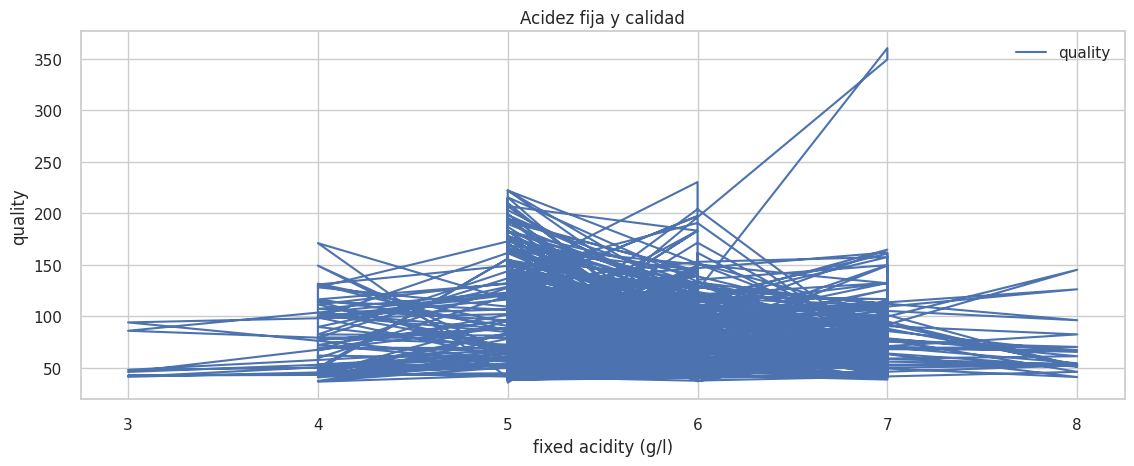

In [130]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='quality')
ax.set_xlabel('fixed acidity (g/l)')
ax.set_ylabel('quality')
ax.set_title('Acidez fija y calidad')
ax.legend()

***Análisis del gráfico***

In [98]:
plt.style.use("bmh")

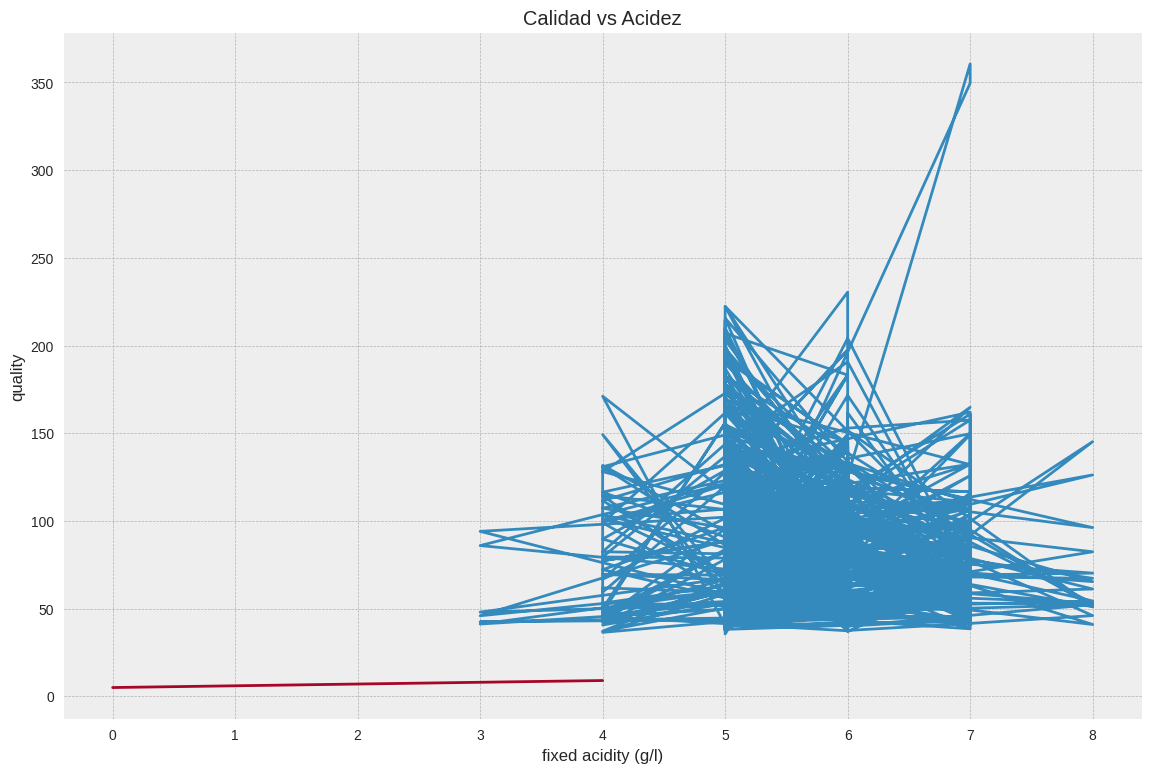

In [99]:
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(x, y, label= 'quality')
ax.set_xlabel('fixed acidity (g/l)')
ax.set_ylabel('quality')
ax.set_title('Calidad vs Acidez')

ax.plot([0,4],[5,9])

***Análisis del gráfico***

Pregunta 1: ¿Cómo influye la acidez en la calidad del vino?

Para este análisis, se utilizará un gráfico de caja (boxplot) para mostrar la distribución de la calidad del vino según los diferentes niveles de acidez fija, volátil y cítrica.

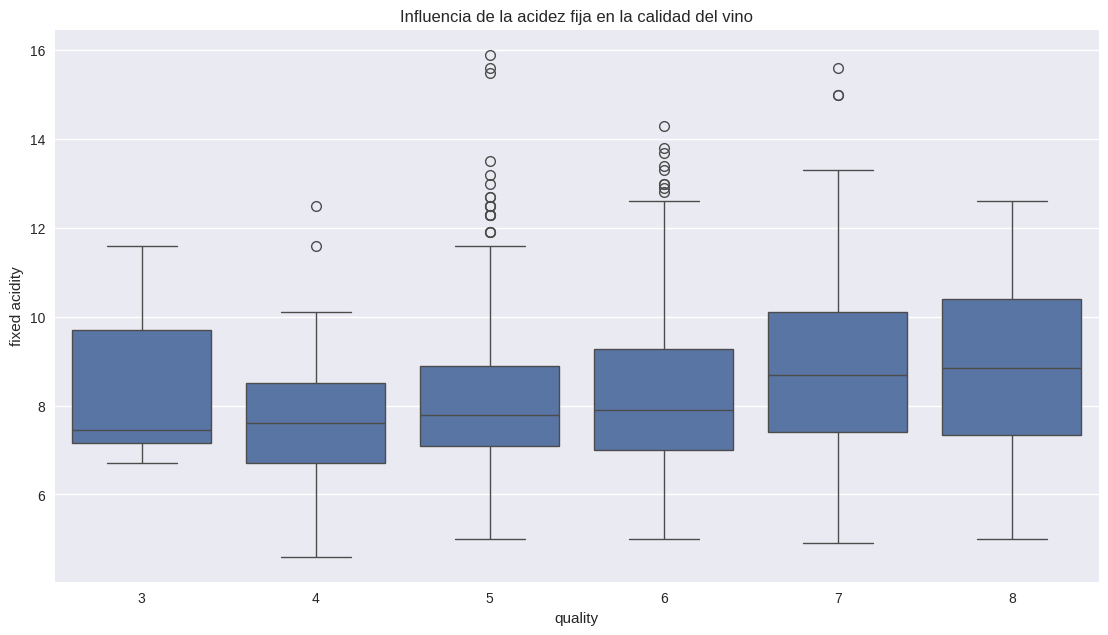

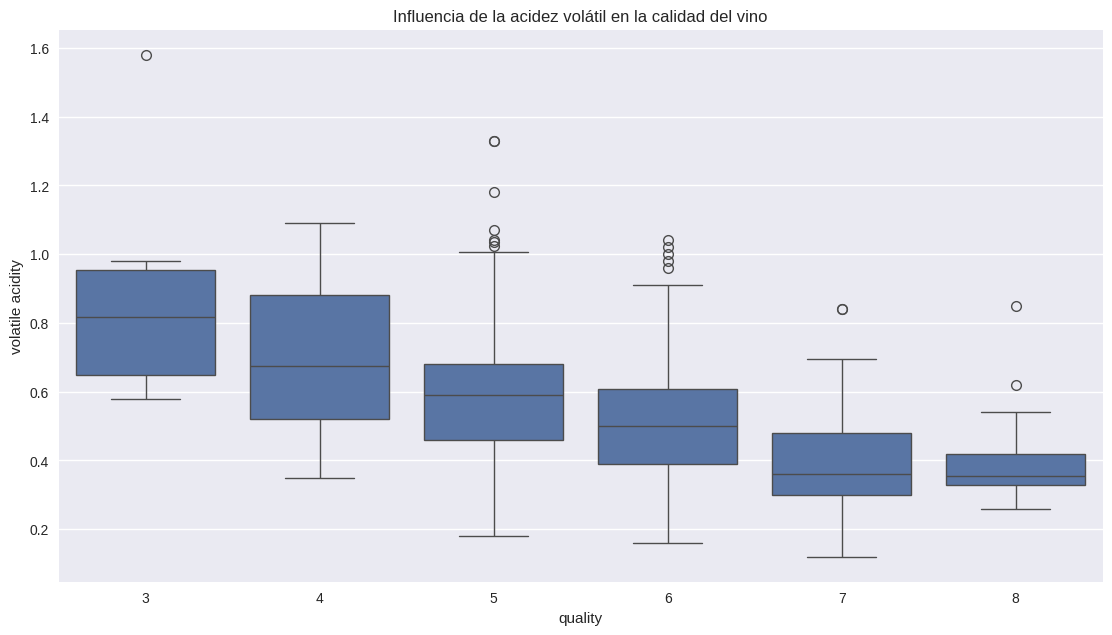

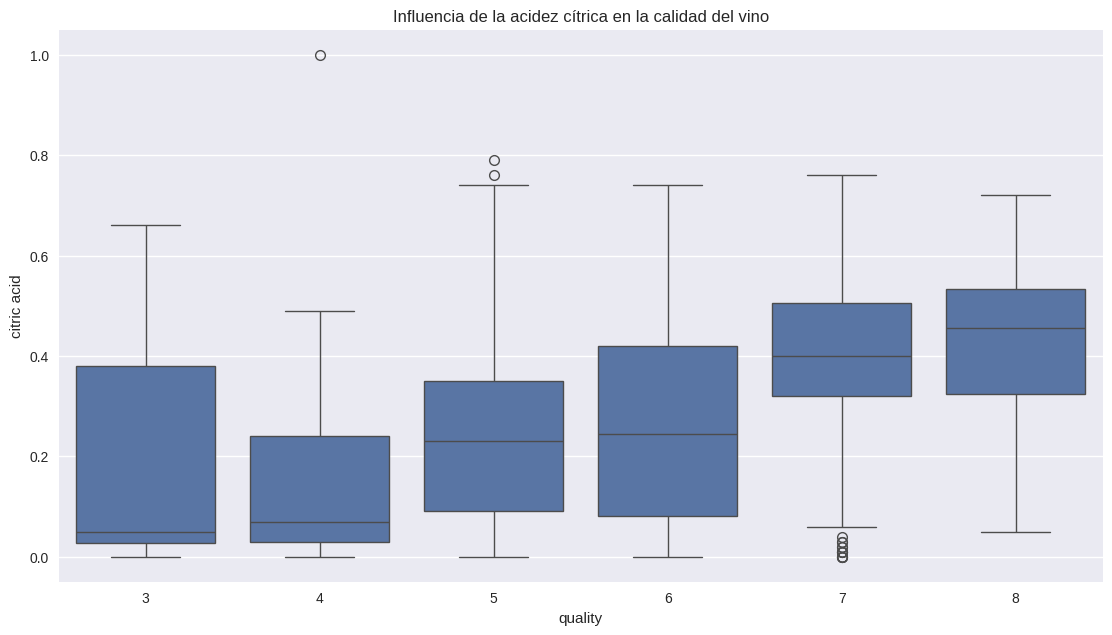

In [183]:
# Boxplot para la acidez fija
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df_archivo)
plt.title('Influencia de la acidez fija en la calidad del vino')
plt.show()

# Boxplot para la acidez volátil
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df_archivo)
plt.title('Influencia de la acidez volátil en la calidad del vino')
plt.show()

# Boxplot para la acidez cítrica
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='citric acid', data=df_archivo)
plt.title('Influencia de la acidez cítrica en la calidad del vino')
plt.show()

***Análisis de los gráficos***

Pregunta 2: ¿El pH del vino se relaciona directamente con la calidad del mismo?

Se utilizará un gráfico de dispersión (scatter plot) para visualizar la relación entre el pH y la calidad del vino.



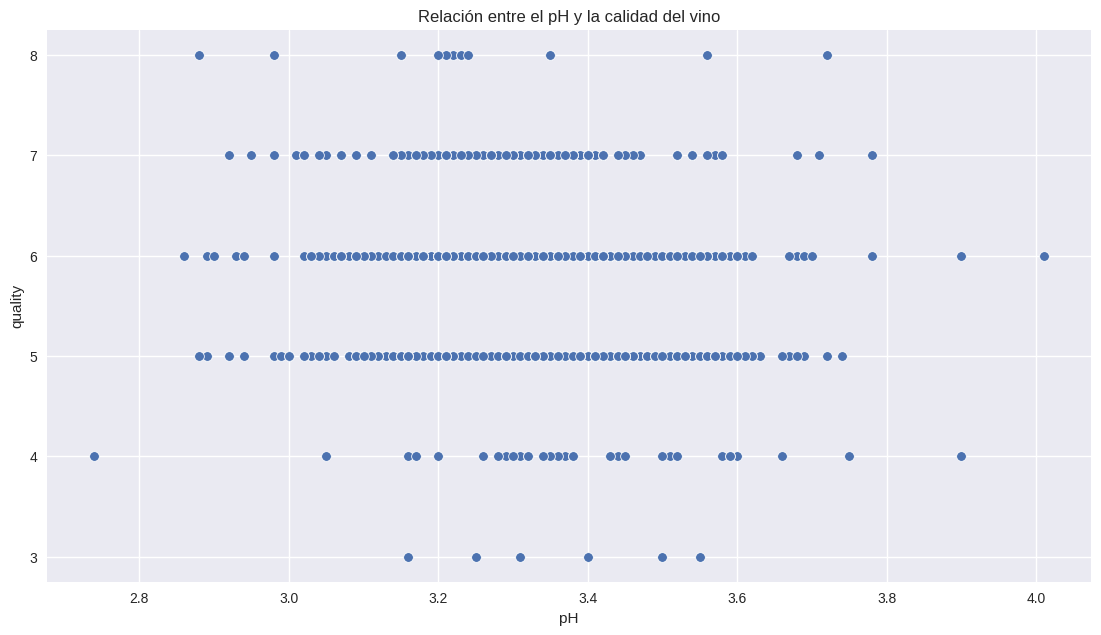

In [184]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pH', y='quality', data=df_archivo)
plt.title('Relación entre el pH y la calidad del vino')
plt.show()

***Análisis del gráfico***

Pregunta 3: ¿Qué tipo de acidez afecta más la calidad del vino?

Se utilizará una matriz de correlación para identificar cuál de los tipos de acidez tiene una correlación más fuerte con la calidad del vino.

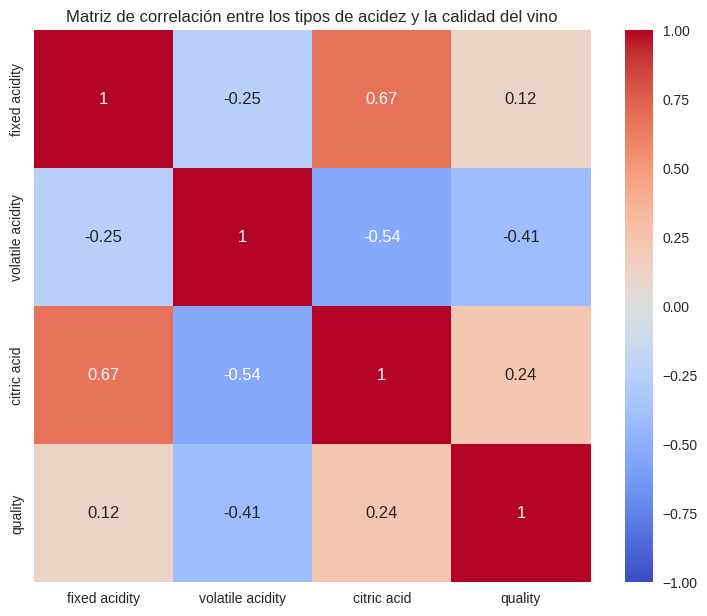

In [185]:
# Matriz de correlación
correlation_matrix = df_archivo[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre los tipos de acidez y la calidad del vino')
plt.show()

***Análisis del gráfico***

Pregunta 4: ¿La acidez del vino determina la graduación etílica?

Se usará un gráfico de dispersión para visualizar la relación entre cada tipo de acidez y el contenido de alcohol.

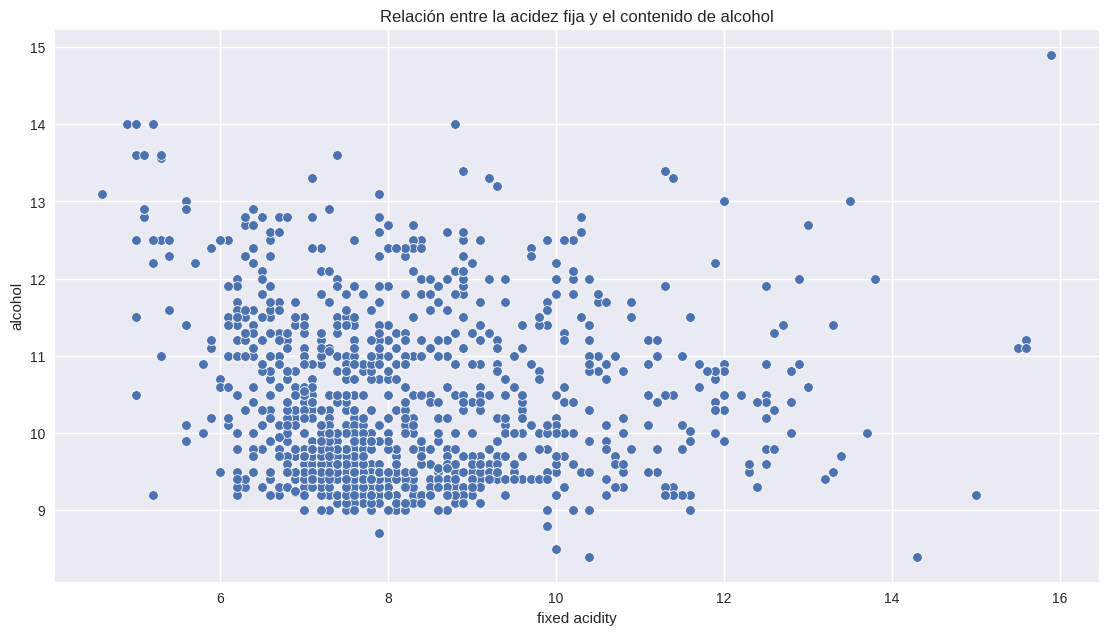

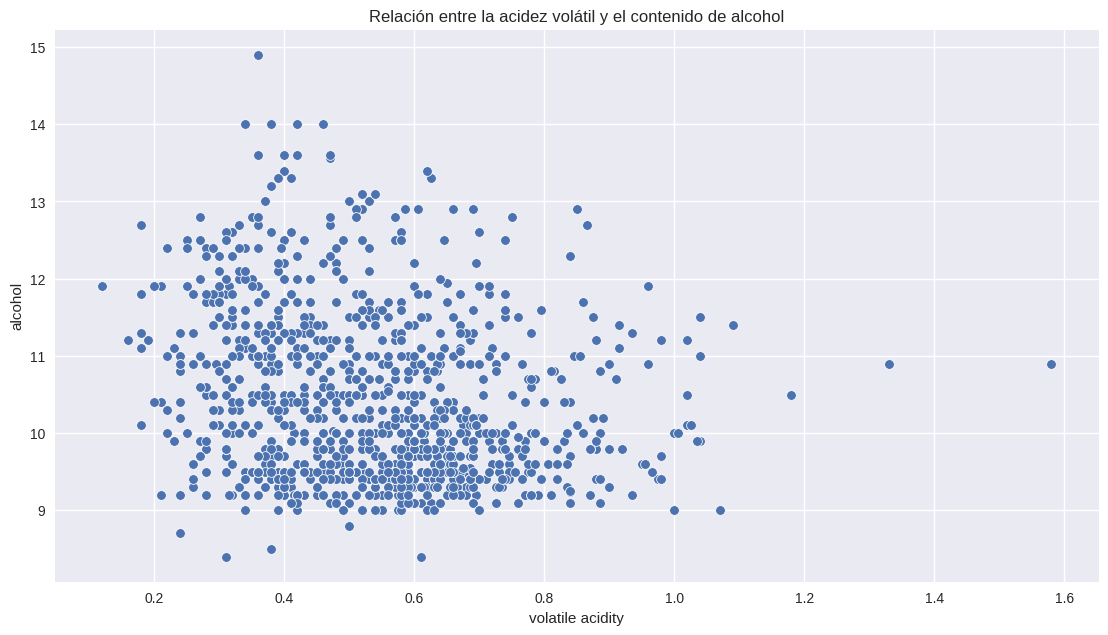

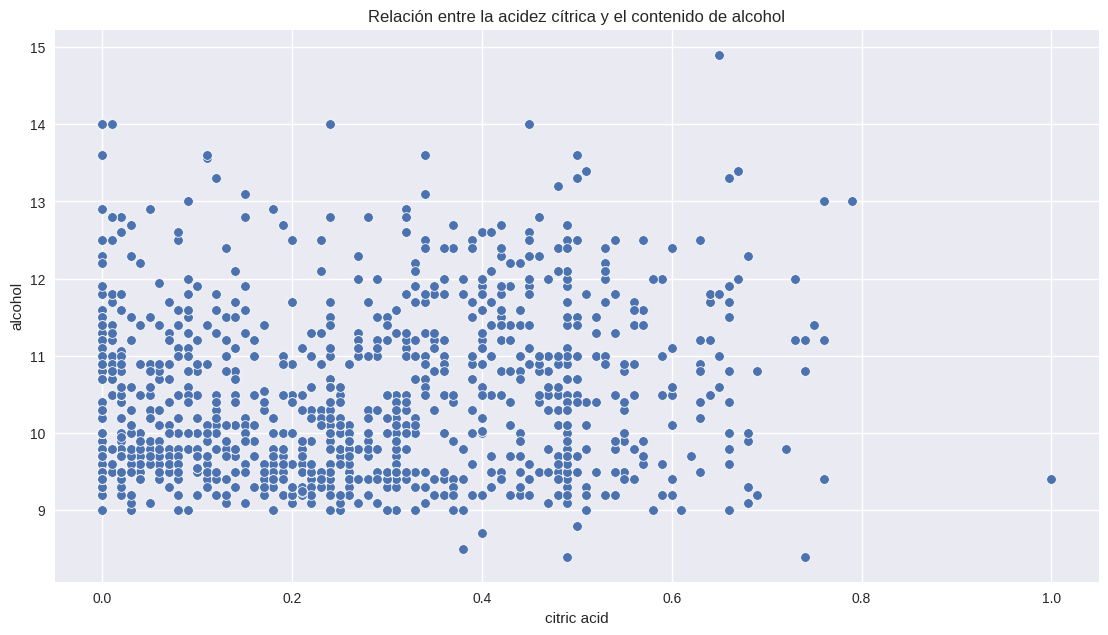

In [186]:
# Scatter plot para la relación entre acidez fija y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fixed acidity', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez fija y el contenido de alcohol')
plt.show()

# Scatter plot para la relación entre acidez volátil y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='volatile acidity', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez volátil y el contenido de alcohol')
plt.show()

# Scatter plot para la relación entre acidez cítrica y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='citric acid', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez cítrica y el contenido de alcohol')
plt.show()

***Análisis de los gráficos***

In [101]:
plt.style.use("fivethirtyeight")

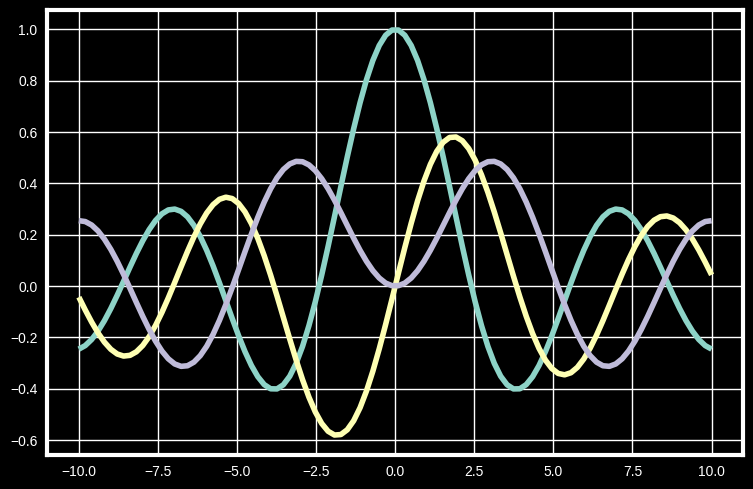

In [ ]:
with plt.style.context("dark_background"):

  fig, ax = plt.subplots()
  x = np.linspace(-10, 10, 100)

  for i in range(0, 3):
    J = jv(i, x)
    ax.plot(x, J)

***Análisis del gráfico***

In [189]:
#pip install mlxtend -- upgrade -- no deps
import pandas as pd
import numpy as np
#para montar en drive
from google.colab import drive
import os
#drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
#print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

# ANÁLISIS DE LOS GRÁFICOS

La acidez es un factor crucial en la calidad del vino y afecta diversos aspectos de su sabor, aroma, estructura y capacidad de envejecimiento. Aquí tienes respuestas a tus preguntas:

Influencia de la acidez en la calidad del vino:

La acidez contribuye a la frescura y viveza del vino, equilibrando su sabor y proporcionando una sensación de "chispa" en el paladar. Una acidez adecuada puede realzar los sabores frutales y mejorar la percepción del vino.
Además, la acidez actúa como conservante natural, ayudando a mantener la estabilidad microbiológica y protegiendo el vino contra la oxidación prematura.
Relación entre el pH del vino y su calidad:

Si bien el pH del vino está relacionado con su acidez, no es el único factor que determina su calidad. Un pH más bajo (más ácido) generalmente se asocia con vinos frescos y vivaces, pero otros aspectos como el equilibrio de sabores, la intensidad aromática, la estructura tánica y la complejidad también son cruciales para la calidad del vino.
Por lo tanto, aunque un pH más bajo puede ser indicativo de una buena acidez y frescura, no garantiza por sí solo la calidad del vino.
Tipo de acidez que afecta más la calidad del vino:

En general, las tres principales ácidos presentes en el vino son el ácido tartárico, el ácido málico y el ácido cítrico. Cada uno contribuye de manera diferente a la percepción de la acidez en el vino.
El ácido tartárico es el ácido principal en la uva y suele ser deseable en el vino, ya que contribuye a la estructura y al equilibrio.
El ácido málico, presente en las uvas verdes, puede aportar frescura pero en exceso puede dar una sensación de acidez áspera.
El ácido cítrico, aunque presente en menor medida, puede agregar complejidad y frescura al vino.
El equilibrio entre estos ácidos es esencial para la calidad general del vino.
La acidez del vino determina la graduación alcohólica:

No, la acidez del vino no determina directamente su graduación alcohólica. La graduación alcohólica del vino está influenciada principalmente por el contenido de azúcar en las uvas y el proceso de fermentación. La acidez puede influir en el equilibrio y la percepción del alcohol en el vino, pero no determina su nivel de alcohol.
En resumen, la acidez es un componente crucial en la calidad del vino, pero su influencia y relación con otros aspectos son complejas y multifacéticas. El equilibrio entre los diferentes ácidos y otros componentes es fundamental para obtener un vino de alta calidad.

# MODELADO Y PREDICCIÓN

Para realizar un árbol de decisión para predecir la calidad del vino en función de sus características, se utilizará una biblioteca de aprendizaje automático scikit-learn.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el archivo CSV
url = 'https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df = pd.read_csv(url)

# Ver las primeras filas del dataframe
print(df.head())

# Dividir los datos en características (X) y etiqueta (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

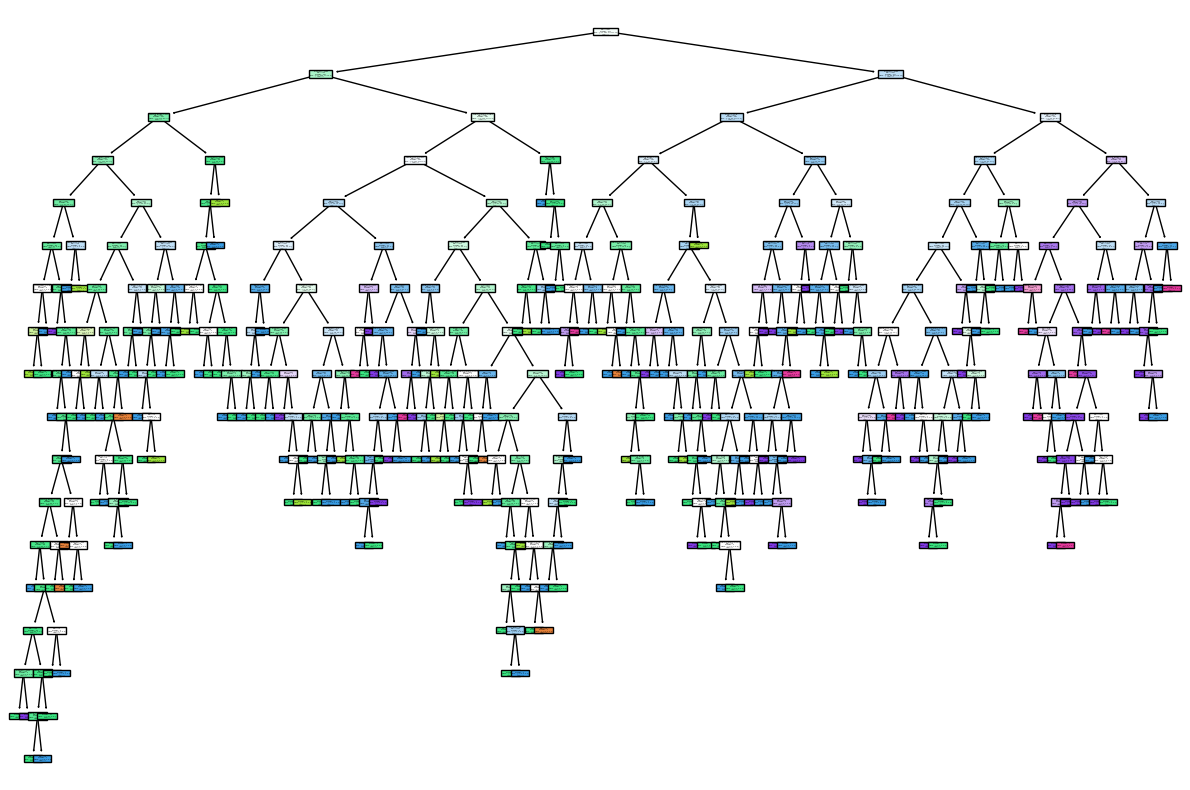

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv"
data = pd.read_csv(url)

# Verificar los primeros registros para entender la estructura de los datos
print(data.head())

# Separar las características (X) y la variable objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['3','4','5','6','7','8'])
plt.show()


In [17]:
# Este código reemplaza los valores categóricos en el DataFrame con valores numéricos. Se crea un diccionario para cada columna
# categórica, donde se mapean los valores originales a valores numéricos. Luego, se utiliza el método replace() de pandas para aplicar
# estos mapeos a las columnas correspondientes en el DataFrame.

dict_CAL = {'<=5': 0, '>5': 1}
df['quality'] = df.quality.replace(dict_CAL)

dict_acidity={'fixed acidity' : 0,'volatile acidity':1, 'citric acid':2}
df['Acidity'] = df['acidity'].replace(dict_AC)

dict_ph={'>=2':0,'=3':1,'<3':2}
df['PH'] = df.Class.replace(dict_ph)



KeyError: 'acidity'

NameError: name 'sns' is not defined

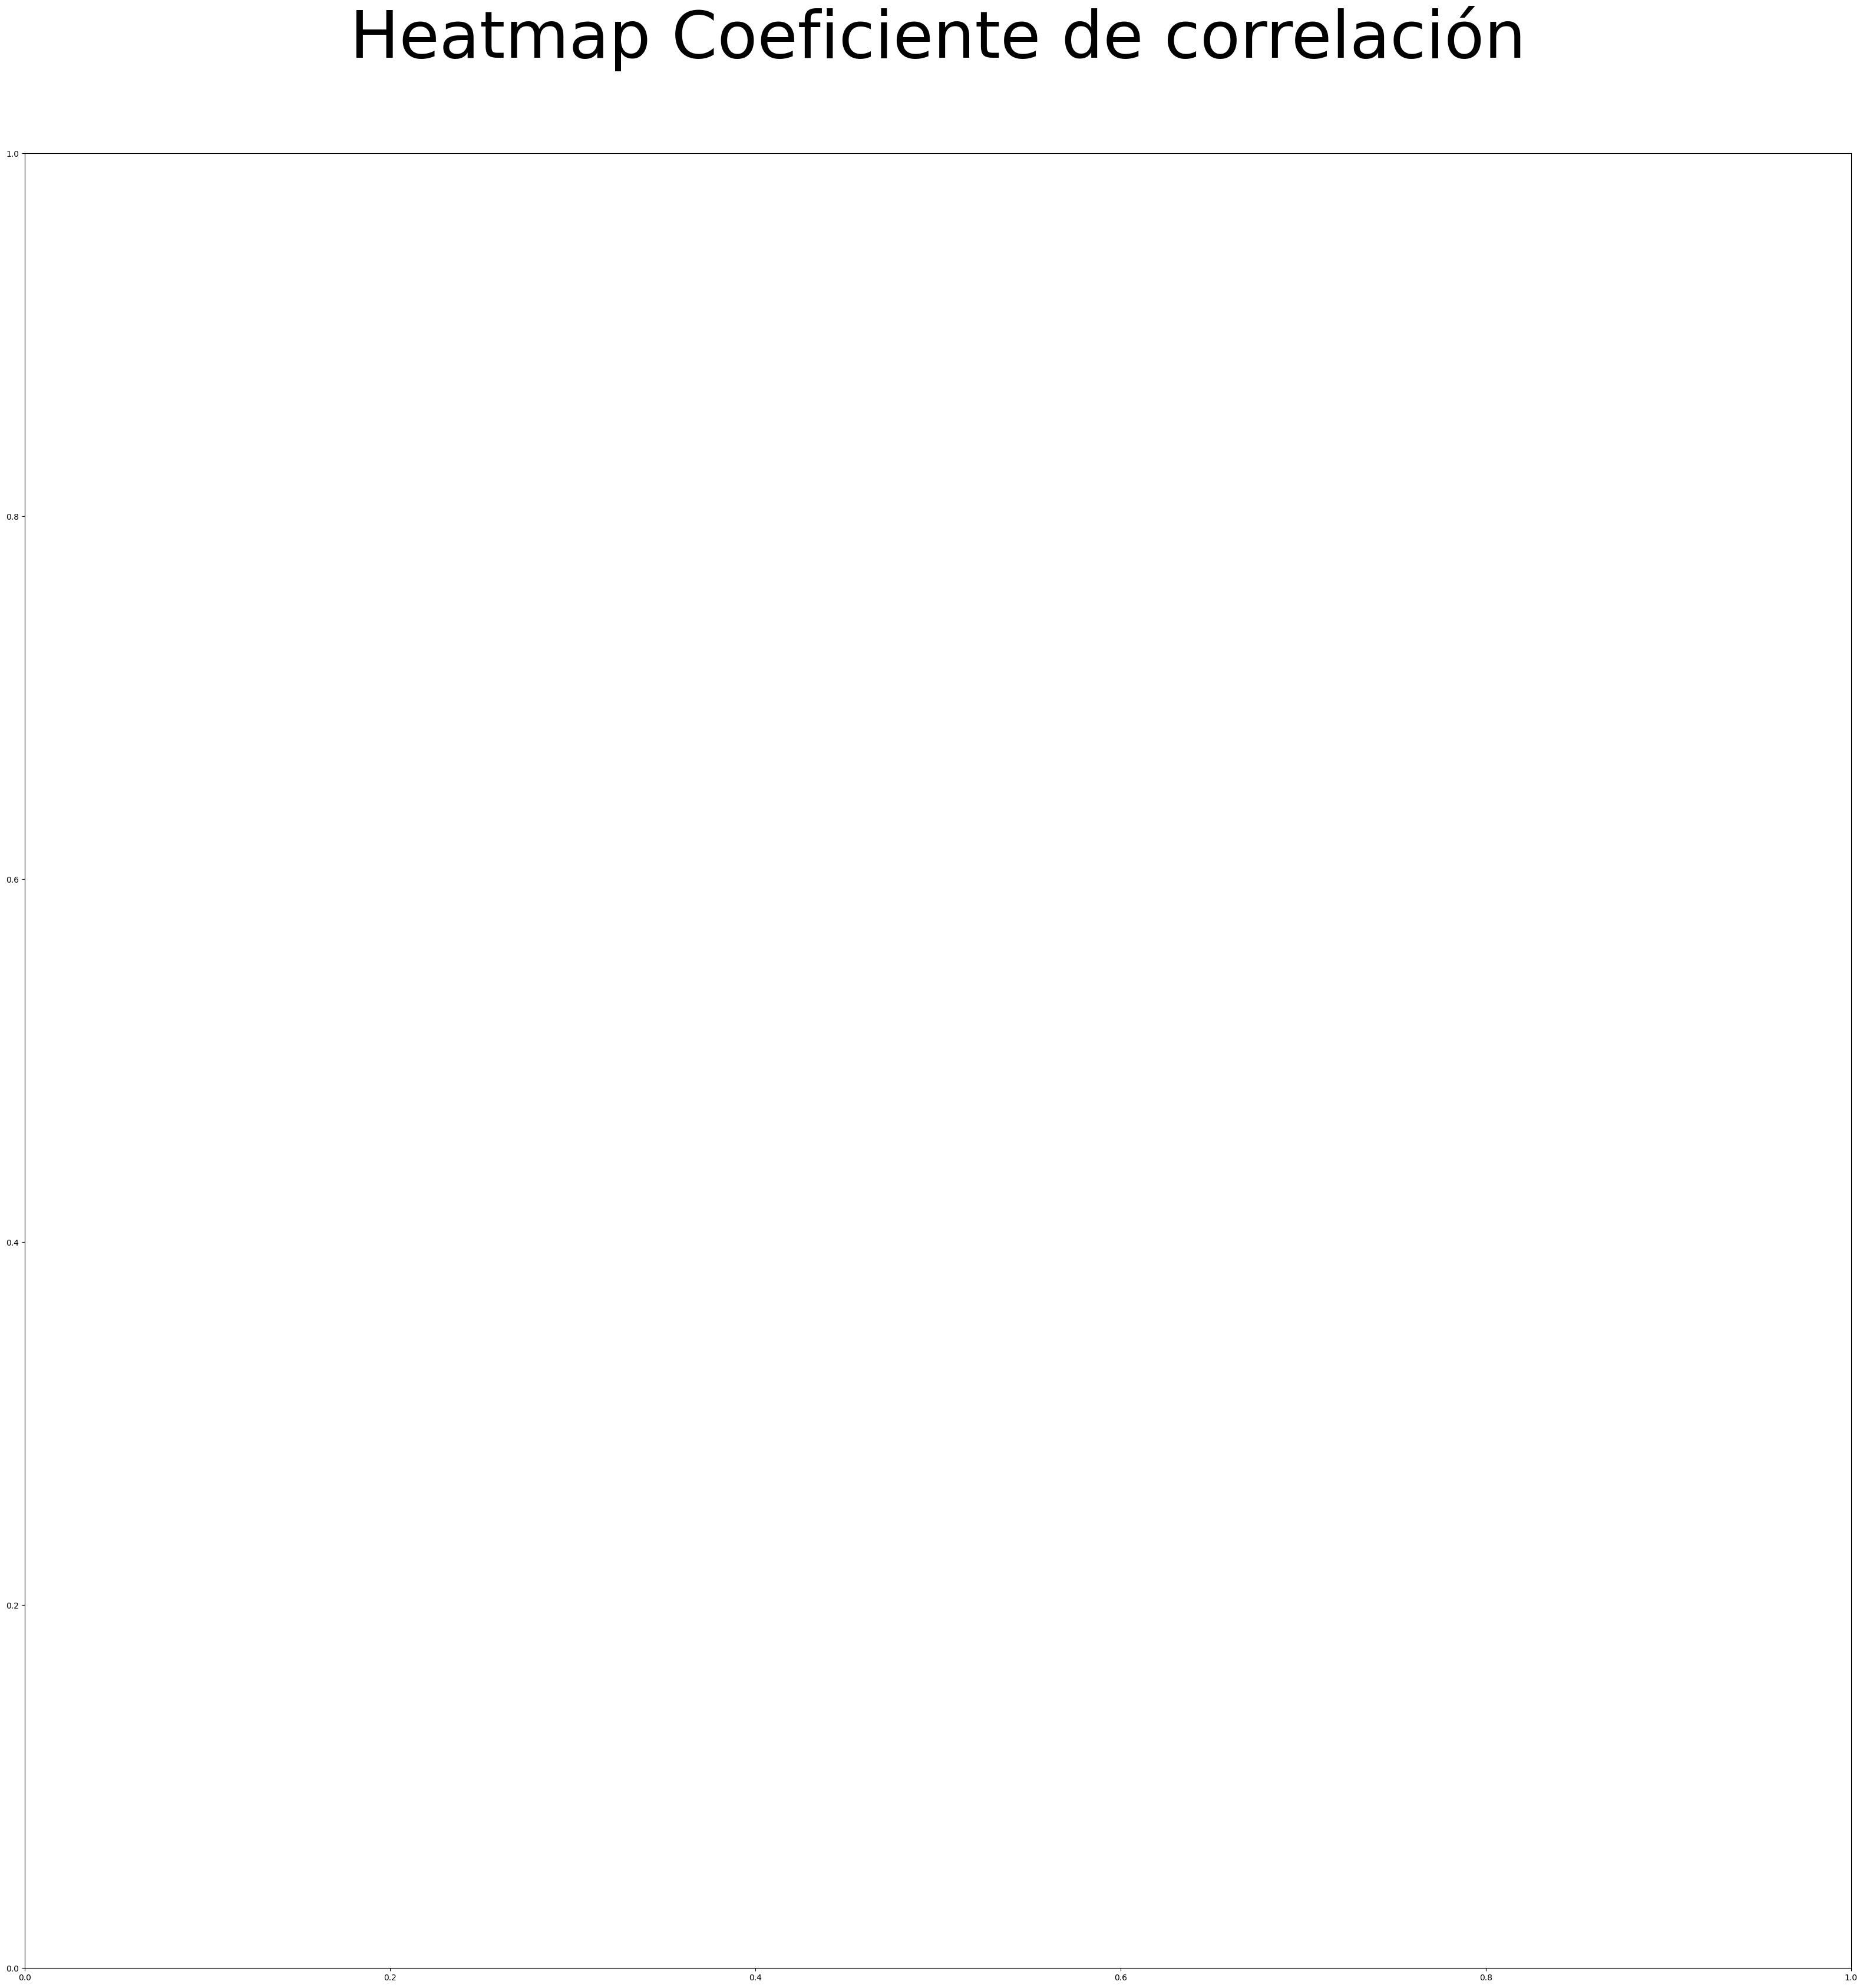

In [16]:
# Este código genera un heatmap que muestra los coeficientes de correlación entre las diferentes variables del DataFrame df.
# Primero, se crea una copia del DataFrame df llamada dfaux, donde se elimina la columna 'satisfaction' utilizando el método drop().
# Luego, se utiliza sns.heatmap() de seaborn para trazar el heatmap de los coeficientes de correlación entre las variables restantes
# en dfaux. Los coeficientes de correlación se calculan utilizando el método corr() de pandas.

df_auxiliar=df.drop(['quality'],axis=1)
mapacoef = plt.cm.viridis

plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(df_auxiliar.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

# VALIDACIÓN DEL MODELO

In [2]:
# Este código genera un heatmap que muestra los coeficientes de correlación entre las diferentes variables del DataFrame df.
# Primero, se crea una copia del DataFrame df llamada dfaux, donde se elimina la columna 'satisfaction' utilizando el método drop().
# Luego, se utiliza sns.heatmap() de seaborn para trazar el heatmap de los coeficientes de correlación entre las variables restantes
# en dfaux. Los coeficientes de correlación se calculan utilizando el método corr() de pandas.

df =df.drop(['quality'],axis=1)
mapacoef = plt.cm.viridis

plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(df_auxiliar.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

NameError: name 'df' is not defined

# CONCLUSIONES Y RECOMENDACIONES